# BUSINESS ANALYTICS OF SALES DATA TO DRIVE INSIGHTS

###  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This is a detailed analysis of business data spooled from the database for each month of the year 2019. The data is accessible as a csv file, stored in one folder.

This report will go through 
<ul>
<li><a href="#Import">Import Packages</a></li>
<li><a href="#Gather">Gather Data</a></li>
<li><a href="#Assess">Assess DataFrame</a></li>
<li><a href="#Define">State Business Problems</a></li>
</ul>

<a id='Import'></a>
## Import Packages

First we import some important python packages that will be used for this analysis.. 
By default, my go to is to import pandas, numpy and os which I'll do below and alias them for easy access and readability.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the dataset for the month of June into a dataframe called df using pandas.
df = pd.read_csv("./Monthly_Sales/Sales_June_2019.csv")
df.shape

(13622, 6)

In [4]:
#view a sample (First three) of the june dataset.
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"


<a id='Gather'></a>
## Gather Data

I'll proceed to gather my dataset but firstly, I'll view the number of files I have my data in, after which I'll proceed to join them for my analysis.

In [5]:
files = [file for file in os.listdir('./Monthly_Sales')]

for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Next, I proceed to join my 12 csv files into one dataframe named Sales_Data using the pandas method `concat` . 

This is similar to the SQL joins which 

In [30]:
Sales_Data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Monthly_Sales/" + file)
    Sales_Data = pd.concat([Sales_Data, df])

Sales_Data.shape

(186850, 6)

In [31]:
#store data in a pandas dataframe
Sales_Data = pd.DataFrame(Sales_Data)

In [32]:
#store dataframe as a csv file
Sales_Data.to_csv('Sales_Data.csv', index=False)

<a id='Assess'></a>
## Assess DataFrame

Now that I have my datasets stored as one file, I see that I have large volume of data with few columns. I'll look into the dataset using several functions to further understand the dataset.
Some of the functions I'll be using are:

`info` , `tail` , `describe` , `isna` , `duplicated`, `unique` , `nunique` and others.


In [34]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [11]:
#check no of null values for each variable.
Sales_Data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [204]:
#check number of unique values for each variable
Sales_Data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [205]:
#check for duplicates
Sales_Data.duplicated().sum()

1162

The above code gives me great insight and detailed info on this data.

The comapany had 186850 entries from january to december 2019, out of this entries, only 178438 orders were unique. I also know that only 20 products are sold in this company.

Some things to take note of when I start wrangling are

- Data types of columns like Dates, quantity ordered. 
- Feature engineering 
- 1162 duplicated orders to be dropped
And other needed wrangling actions.

<a id='Define'></a>
## State Business Problems

<ul>
<li><a href="#1">What month had the most sales, and how much was sales was made?</a></li>
<li><a href="#2">What city had the highest number of sales?</a></li>
<li><a href="#3">What is the best time for advertising to increase revenue through customer purchase?</a></li>
<li><a href="#4">What products often sell together?</a></li>
<li><a href="#4">What product sold the most and why?</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

I enjoy using the dot `.` to assess a particular column in my dataframe. This makes codes shorter and easier to read. although, certain things can cause that to bring errors. Things like a space in between and that would force me to do this `Sales_Data['Order ID'].sum()` instead of this `Sales_Data.Order_ID.sum()` So I'll proceed to remove spaces from my column names using the `rename` function and a `lambda` function. I'll also change the column names to lower case. 

    Please note that this is solely based on preference. it can be skipped.

Some feature engineering will also be done here.


<li><a href="#new_col">Feature Engineering</a></li>



In [36]:
#replacing spaces in my column names with underscores for readability
Sales_Data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [37]:
Sales_Data.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


Next I drop the detected duplicated.

In [38]:
# drop the duplicates
Sales_Data = Sales_Data.drop_duplicates()

Next I drop nulls and empty records (na) detected in the dataset.

In [39]:
#drop null values
Sales_Data = Sales_Data.dropna()

In [22]:
#check data frame
Sales_Data.isnull().value_counts().sum()

186305

Next I change the data type of my columns change date to datetime and the figures to int.

In [46]:
# change my order date column from series to datetime

from datetime import datetime 
Sales_Data['order_date'] = pd.to_datetime(Sales_Data['order_date'])


In [47]:
type(Sales_Data['order_date'][0])

pandas.core.series.Series

I would also like to change the quantity_ordered column to int.

In [42]:
#check the unique values in the column to be sure they are all numbers.
Sales_Data.quantity_ordered.unique() 

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

I noticed an error showing "Quantity Ordered" as one of the values in the so I intend to remove it from the dataset `query` method of the pandas package, then I use the `drop` method on the queried row to clean the dataset.

In [43]:
Sales_Data.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [44]:
Sales_Data.drop(Sales_Data.query('quantity_ordered == "Quantity Ordered"').index, inplace = True)

In [45]:
Sales_Data.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


In [219]:
Sales_Data.quantity_ordered = Sales_Data.quantity_ordered .astype(int)

In [48]:
Sales_Data['product'] = Sales_Data['product'].astype(str)
Sales_Data['purchase_address'] = Sales_Data['purchase_address'].astype(str)

In [49]:
Sales_Data.dtypes

order_id                    object
product                     object
quantity_ordered            object
price_each                  object
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [51]:
print(Sales_Data.price_each.max())
print(Sales_Data.price_each.min())

999.99
109.99


In [58]:
Sales_Data.price_each = Sales_Data.price_each.astype(float)
Sales_Data.quantity_ordered = Sales_Data.quantity_ordered.astype(int)
Sales_Data.dtypes

order_id                    object
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
order_month                 object
dtype: object

<a id='new_col'></a>
## Feature Engineering

Firstly, I'd like to do some Feature Engineering on the `order_date` column to extract month as a new column and name it `order_month` 

Secondly, I'd create a new column `order_sales` which shows sales for each product ordered by multiplying `quantity_ordered` by `price_each` 

Finally, I'd proceed to change the new column `order_sales` to display as an actual currency in dollar.

In [53]:
Sales_Data['order_month'] = pd.to_datetime(Sales_Data['order_date']).dt.month_name()

In [54]:
Sales_Data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [55]:
# Sample of my query to spool all orders in the 12th month being "December"
Sales_Data.query('order_month == "December"').sample()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month
5937,301321,Apple Airpods Headphones,1,150.0,2019-12-06 00:54:00,"320 Highland St, New York City, NY 10001",December


In [56]:
#see the number of orders processed for each month
Sales_Data.order_month.value_counts()

December     24943
October      20248
April        18257
November     17543
May          16551
March        15127
July         14274
June         13534
February     11956
August       11942
September    11602
January       9698
Name: order_month, dtype: int64

In [59]:
# Get a new column showing the amount of money for each order of a product
Sales_Data['order_sales'] = Sales_Data['quantity_ordered'] * Sales_Data['price_each']

In [60]:
#check to see if the new column is in place

Sales_Data.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00


I found a code on [stack overflow](https://stackoverflow.com/questions/35019156/pandas-format-column-as-currency) 
that enables me change the `price_each` column to show as a currency column with each price in dollars.

In [232]:
# from babel.numbers import format_currency

# Sales_Data.order_sales= Sales_Data.order_sales.apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

<a id='eda'></a>
## Exploratory Data Analysis

It's time to explore my data and proceed to show visualizations to answer business questions.

Needed packages `matplotlib` and `seaborn` have been imported and aliased as plt and sns respectively.
Also, the matplotlib inline that enables us show visualizations within the notebook.

<a id='1'></a>
### What month had the most sales, and how much was sales was made?

To answer this question, I group the dataset by the newly derived column `order_month` and the corresponding sum of `order_sales` for each month.

In [69]:
# Convert some columns to required data types
ordinal_var_dict = {'order_month': ['January','February', 'March','April','May','June','July','August',
'September','October','November','December']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    Sales_Data[var] = Sales_Data[var].astype(ordered_var)

In [70]:
result = Sales_Data.groupby('order_month').sum('order_sales').sort_values(by =
 'order_sales', ascending = False)
result

,quantity_ordered,price_each,order_sales
order_month,,,
December,28073,4583252.82,4608280.75
October,22668,3713008.80,3734177.86
April,20536,3366218.76,3389217.98
November,19768,3178860.58,3197863.10
May,18652,3133024.62,3150506.24
March,16978,2789080.80,2804969.51
July,16053,2631075.12,2646311.32
June,15233,2560491.51,2576268.16
August,13428,2226951.91,2241071.38


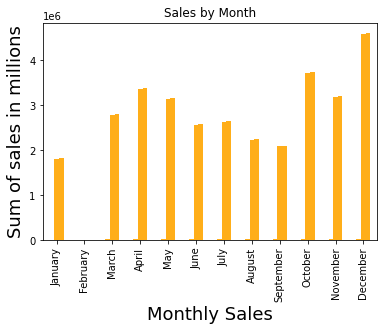

In [71]:
counts = Sales_Data.groupby('order_month').sum('order_sales')
# Sales_Data.groupby(['order_month']).sum()['order_sales']
counts.plot(kind='bar', title='Sales by Month',  color='orange', alpha=.9, legend = None );
plt.xlabel('Monthly Sales', fontsize=18)
plt.ylabel('Sum of sales in millions', fontsize=18);

From the chart above, we see that sales were highest in the month of december and lowest in January.

<a id='2'></a>
### What city had the highest number of sales?

Some Feature engineering to enable me get the required data

In [74]:
df = Sales_Data.copy()
df.purchase_address

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: purchase_address, Length: 185675, dtype: object

In [76]:
df[['street', 'city', 'zip_code']] = df.purchase_address.str.split(',', expand= True)
df.sample()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_sales,street,city,zip_code
16942,192727,27in 4K Gaming Monitor,1,389.99,2019-04-19 10:54:00,"474 4th St, San Francisco, CA 94016",April,389.99,474 4th St,San Francisco,CA 94016


In [77]:
city_group =df.groupby('city').sum('order_sales').sort_values(by = 'order_sales', ascending = False)
city_group

,quantity_ordered,price_each,order_sales
city,,,
San Francisco,50166,8203867.45,8254609.62
Los Angeles,33245,5417147.76,5448280.34
New York City,27901,4632767.55,4661714.15
Boston,22492,3633698.41,3657927.66
Atlanta,16583,2778604.85,2794195.23
Dallas,16707,2750026.38,2765373.96
Seattle,16534,2730586.55,2745046.02
Portland,14037,2306588.80,2319331.94
Austin,11136,1808325.08,1818029.38


In [78]:
city_names = df['city'].unique()
city_names

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

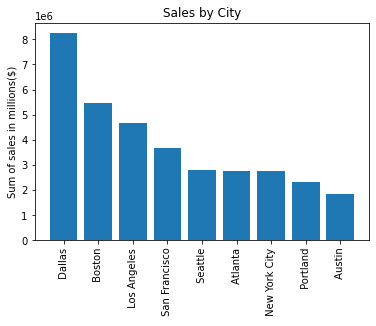

In [90]:
counts = df.groupby('city').sum()['order_sales']
plt.bar(city_names, city_group['order_sales'])
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('Sales by City')
plt.ylabel('Sum of sales in millions($)');

Dallas yielded the highest revenue while Austin yielded less.

<a id='3'></a>
### What is the best time for advertising to increase revenue through customer purchase?

<a id='4'></a>
### What products often sell together?

In [92]:
df['relate'] = df.groupby('order_id')['product'].transform (lambda x: ','.join(x))
df.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_sales,street,city,zip_code,relate
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,917 1st St,Dallas,TX 75001,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,682 Chestnut St,Boston,MA 02215,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,669 Spruce St,Los Angeles,CA 90001,"Google Phone,Wired Headphones"


In [93]:
oa = df[['order_id', 'relate']].drop_duplicates()
oa

,order_id,relate
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
11681,259353,AAA Batteries (4-pack)
11682,259354,iPhone
11683,259355,iPhone
11684,259356,34in Ultrawide Monitor


In [94]:
oa.groupby('relate').count().sort_values(by = 'order_id', ascending = False)

,order_id
relate,
Lightning Charging Cable,19875
AAA Batteries (4-pack),19854
USB-C Charging Cable,19832
AA Batteries (4-pack),19827
Wired Headphones,17238
...,...
"LG Dryer,Flatscreen TV",1
"LG Dryer,AAA Batteries (4-pack)",1
"LG Dryer,27in FHD Monitor",1


In [95]:
from itertools import combinations 
from collections import Counter

In [96]:
count = Counter()
for row in df['relate']:
    row_lst = row.split(',')
    count.update(Counter(combinations(row_lst, 2)))

for key, value in count.most_common(10):
    print (key, value)


('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


<a id='5'></a>
### What product sold the most and why?

In [97]:
Sales_Data.groupby('product').sum('quantity_ordered').sort_values(
    by = 'quantity_ordered', ascending = False)

,quantity_ordered,price_each,order_sales
product,,,
AAA Batteries (4-pack),30985,61626.89,92645.15
AA Batteries (4-pack),27614,78938.88,106037.76
USB-C Charging Cable,23929,261191.15,285951.55
Lightning Charging Cable,23168,323054.55,346361.60
Wired Headphones,20522,225975.53,246058.78
Apple Airpods Headphones,15636,2328600.00,2345400.00
Bose SoundSport Headphones,13429,1329567.03,1342765.71
27in FHD Monitor,7541,1124625.02,1131074.59
iPhone,6847,4788000.00,4792900.00


In [251]:
c = Sales_Data.groupby('product').sum('quantity_ordered').sort_values(by = 'quantity_ordered', ascending = False)
type(c)

pandas.core.frame.DataFrame

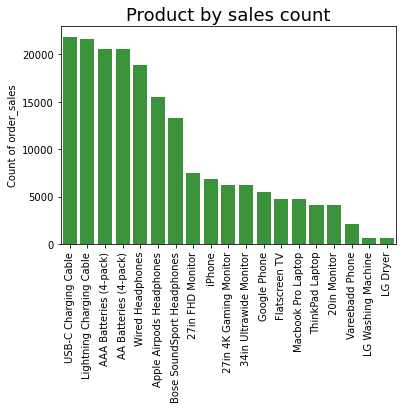

In [108]:
base_color = sns.color_palette()[2]
sns.countplot(data = Sales_Data, x = 'product', color=base_color,
order = Sales_Data['product'].value_counts().index)
plt.title('Product by sales count', fontsize=18)
plt.xlabel('')
plt.ylabel('Count of order_sales')
plt.xticks(rotation = 90);